In [4]:
import os
import pandas as pd
import seaborn as sns

In [10]:
fcr_data=pd.read_csv('C:\\Users\\surgi\\source\\repos\\0.basic\\FCR_0.9_data&metric.txt',sep='\t',index_col=0)

In [11]:
fcr_corr=fcr_data.corr()

In [24]:
fc1=fcr_corr.iloc[:-8,-8:]
fc1.loc['Max'] = fc1.max(axis=0)
fc1.loc['Max_ab'] = fc1.iloc[:-1,:].abs().max(axis=0)
fc1.loc['Corr']=['Positive' if fc1.loc['Max',x]==fc1.loc['Max_ab',x] else 'Negative' for x in fc1.columns.to_list()]
fc_t=fc1.T

In [28]:
fc1.head()

,FCR_0.9_mean,FCR_0.9_median,FCR_0.9_std,FCR_0.9_cv,FCR_0.9_range,FCR_0.9_iqr,FCR_0.9_kurtosis,FCR_0.9_skewness
PCA_FCR_1_0.9_10,-0.829618,-0.828667,-0.244434,-0.072161,-0.219167,-0.271079,0.249172,0.256107
PCA_FCR_2_0.9_10,-0.337872,-0.297605,-0.370661,-0.320776,-0.3192,-0.366594,0.126795,0.085877
PCA_FCR_3_0.9_10,0.383825,0.321916,0.600174,0.505425,0.42406,0.595763,-0.165833,-0.064617
PCA_FCR_4_0.9_10,-0.161844,-0.191722,0.14449,0.233848,0.124219,0.127926,0.011338,0.026999
PCA_FCR_5_0.9_10,0.008298,0.011725,-0.004217,0.032843,0.02501,0.021918,-0.049154,-0.021969


In [32]:
fcr_dic = {}
for i in [x.split('_')[-1] for x in fc1.columns.to_list()]:
    if fc1.loc['Corr','FCR_0.9_' + i]=='Positive':
        sf = fc1.loc[fc1['FCR_0.9_' + i] == fc1.loc['Max', 'FCR_0.9_' + i]].index.to_list()[0]
    else:
        sf = fc1.loc[fc1['FCR_0.9_' + i] == -fc1.loc['Max_ab', 'FCR_0.9_' + i]].index.to_list()[0]
    fcr_dic['FCR_0.9_' + i] = sf

In [34]:
fcr_dic

{'FCR_0.9_mean': 'PCA_FCR_1_0.9_80',
 'FCR_0.9_median': 'PCA_FCR_1_0.9_50',
 'FCR_0.9_std': 'PCA_FCR_3_0.9_10',
 'FCR_0.9_cv': 'PCA_FCR_2_0.9_60',
 'FCR_0.9_range': 'PCA_FCR_3_0.9_10',
 'FCR_0.9_iqr': 'PCA_FCR_3_0.9_10',
 'FCR_0.9_kurtosis': 'PCA_FCR_1_0.9_80',
 'FCR_0.9_skewness': 'PCA_FCR_1_0.9_50'}

D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\surgi\AppData\Local\Temp\ipykernel_33376\566064939.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  g.fig.show()
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na o

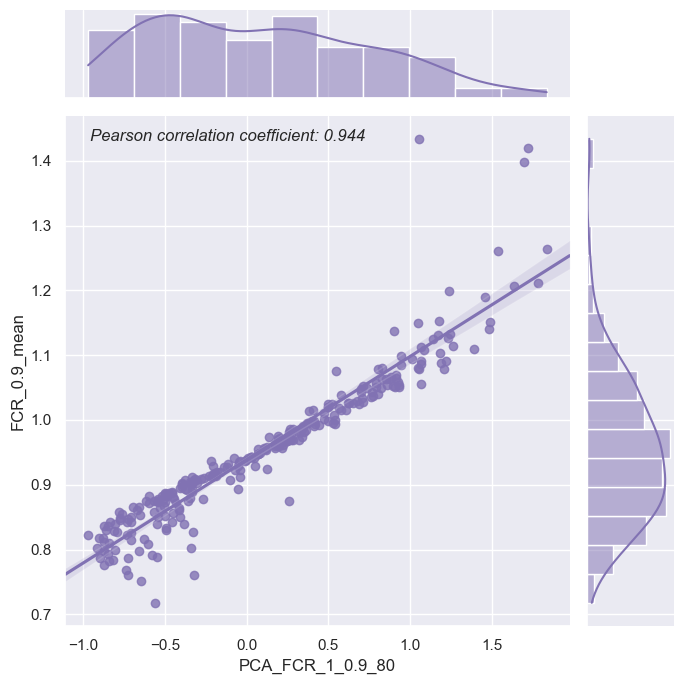

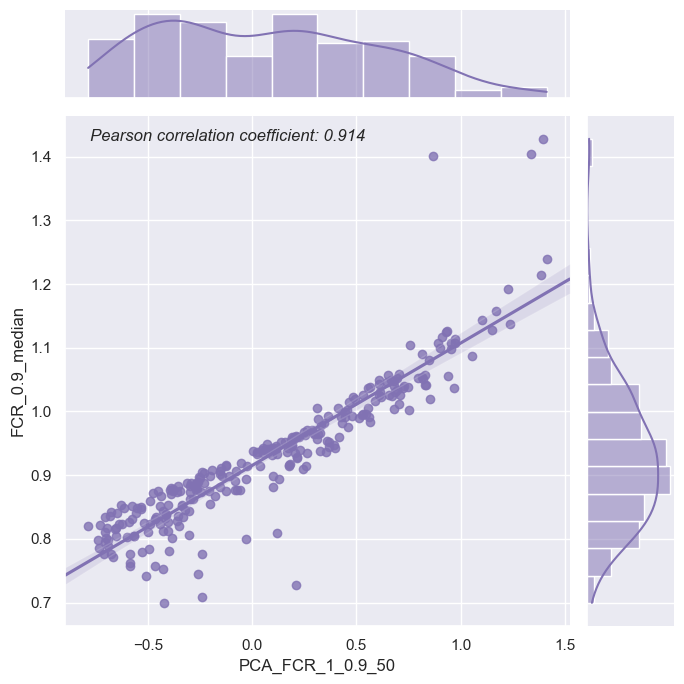

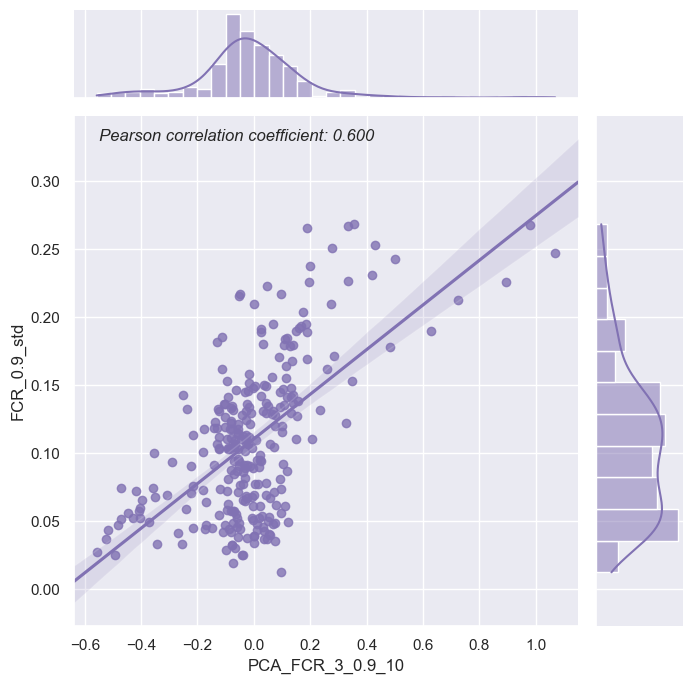

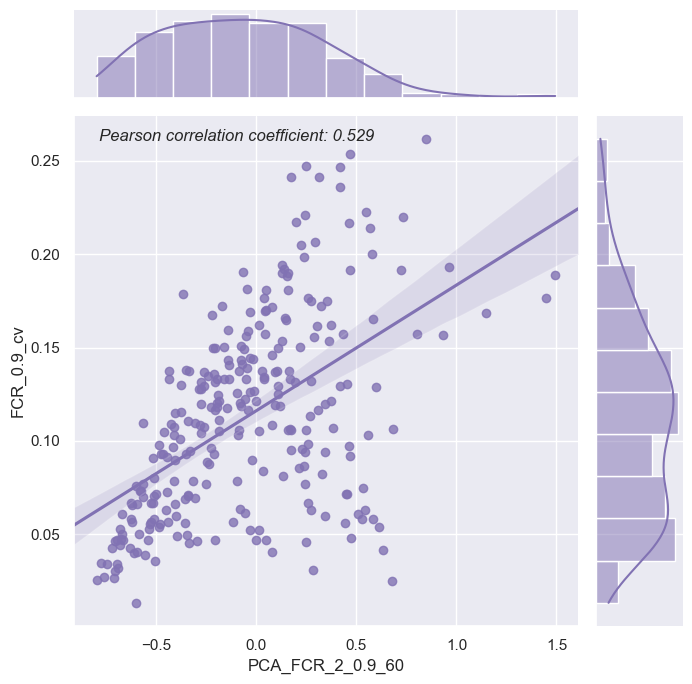

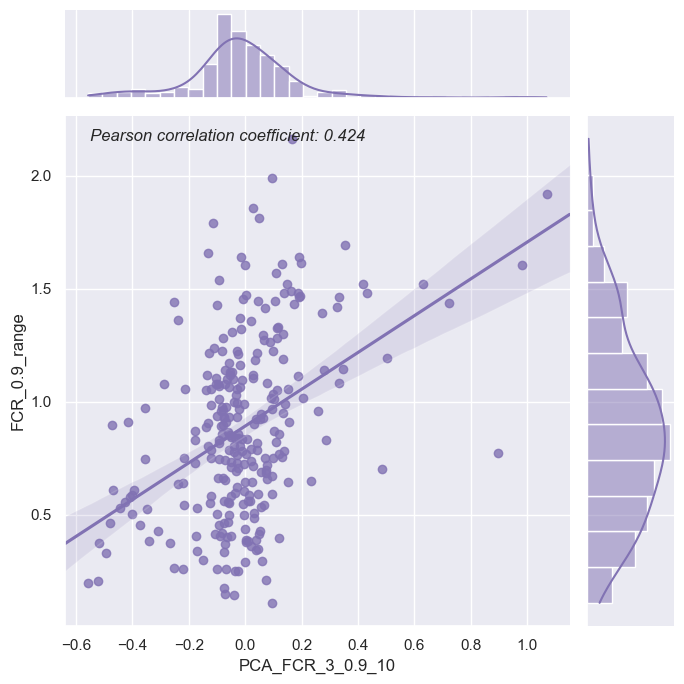

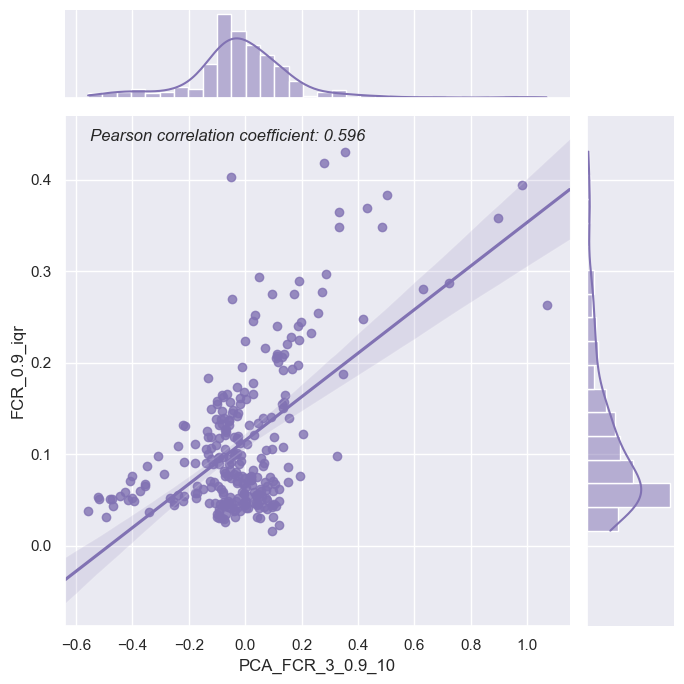

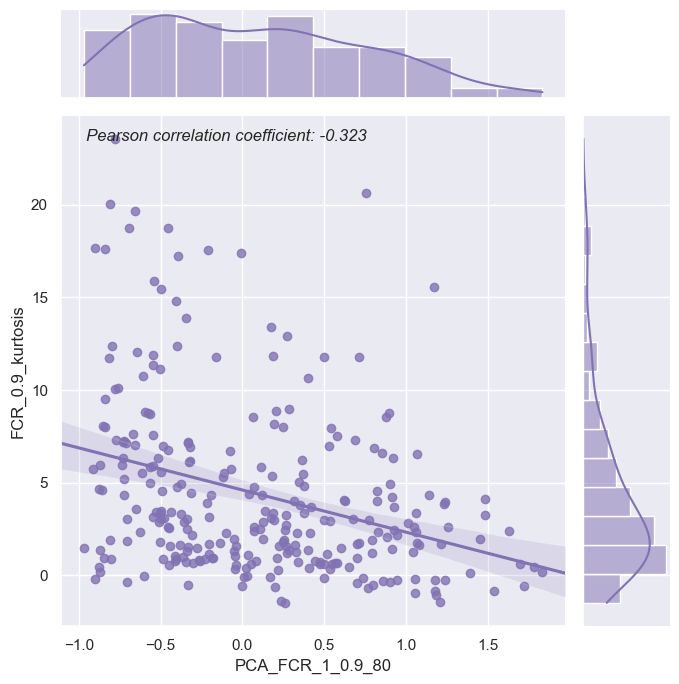

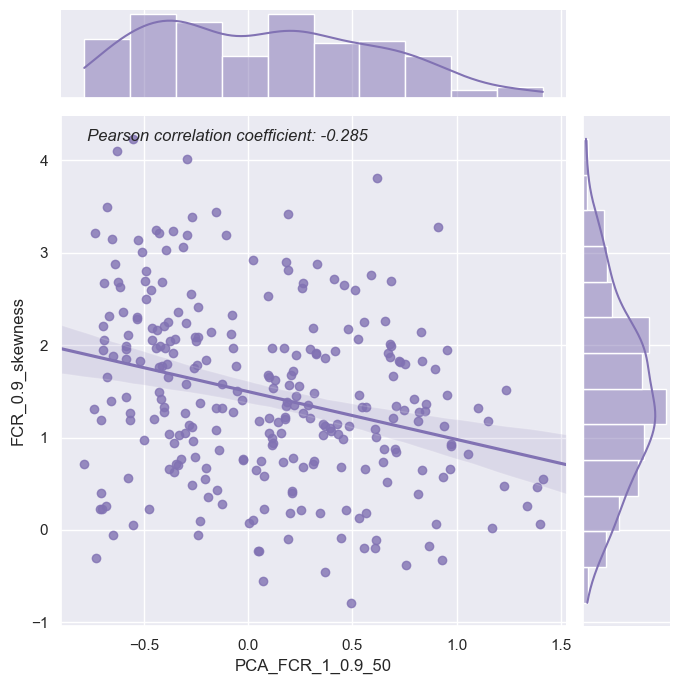

In [46]:
for i,j in fcr_dic.items():
    sns.set_theme(style="darkgrid")
    g = sns.jointplot(x=j, y=i, data=fcr_data,
                      kind="reg", truncate=False,
                      color="m", height=7)
    g.ax_joint.text(x=0.05,y=0.95,fontstyle='italic',transform=g.ax_joint.transAxes,
                    s=r'Pearson correlation coefficient: {:.3f}'.format(fc_t.loc[i,j]))
    g.fig.show()
    